# Image Emotion Detection

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


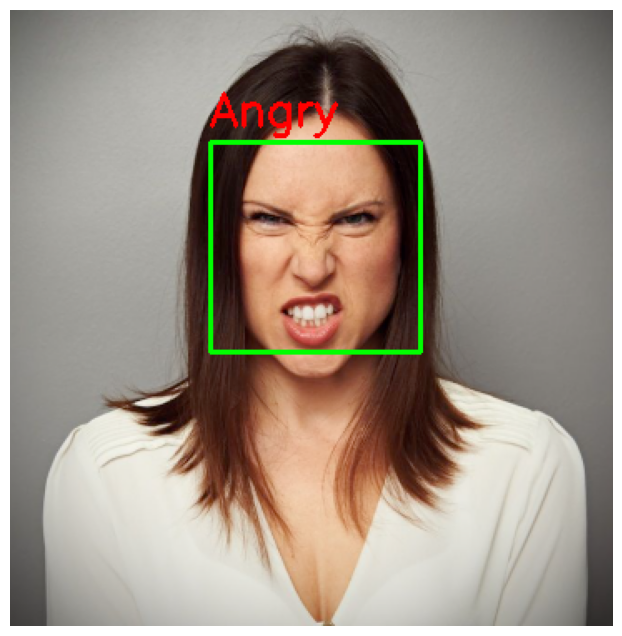

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# Load the Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the trained emotion recognition model
model = load_model("best_emotion_model.keras")

# Emotion Classes
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


# ✅ Preprocessing function for a face image
def preprocess_face(face_img):
    face = cv2.resize(face_img, (48, 48))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face = face / 255.0
    face = np.expand_dims(face, axis=-1)
    face = np.expand_dims(face, axis=0)
    return face


# ✅ Emotion Prediction Function
def predict_emotion(face_img):
    processed = preprocess_face(face_img)
    prediction = model.predict(processed)
    class_idx = np.argmax(prediction)
    return classes[class_idx]


# ✅ Select image file
Tk().withdraw()
file_path = filedialog.askopenfilename()

# ✅ Read image
image = cv2.imread(file_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ✅ Detect faces
faces = face_cascade.detectMultiScale(image_rgb, scaleFactor=1.1, minNeighbors=5)

# ✅ Plot
for (x, y, w, h) in faces:
    face_img = image[y:y+h, x:x+w]
    label = predict_emotion(face_img)

    # Draw rectangle and label
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image_rgb, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.9, (255, 0, 0), 2)

# ✅ Display result
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

if len(faces) == 0:
    print("No face detected in the image.")


# WebCam Code

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ✅ Load the trained emotion recognition model
model = load_model('best_emotion_model.keras')

# ✅ Define emotion classes
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# ✅ Preprocessing function
def preprocess_face(face_img):
    face = cv2.resize(face_img, (48, 48))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  # Remove if model trained on RGB
    face = face / 255.0
    face = np.expand_dims(face, axis=-1)
    face = np.expand_dims(face, axis=0)
    return face

# ✅ Prediction function
def predict_emotion(face_img):
    processed = preprocess_face(face_img)
    prediction = model.predict(processed)
    class_idx = np.argmax(prediction)
    return classes[class_idx]

# ✅ Start webcam (0 = default webcam)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]
        label = predict_emotion(face_img)

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the frame
    cv2.imshow('Webcam Emotion Detection', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# ✅ Release and close
cap.release()
cv2.destroyAllWindows()


[ WARN:0@5466.793] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@5466.804] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
